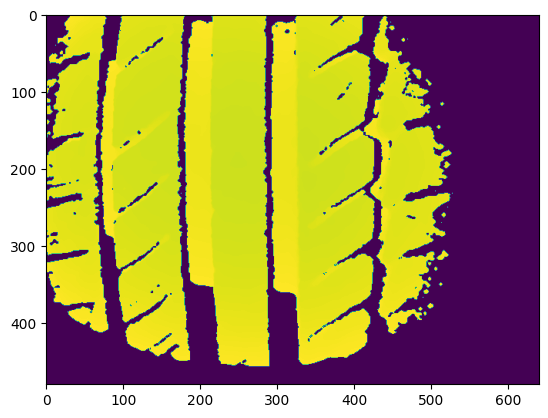

(480, 640)


In [11]:
import numpy as np
import matplotlib.pyplot as plt

pointcloud1 = np.load("data\depth_image.npy")
pointcloud2 = np.load("data\depth_image.npy (1).npy")

plt.imshow(pointcloud1)
plt.show()

print(pointcloud1.shape)

[282, 282, 282, 282, 282, 282, 282, 282, 282, 282, 282, 282, 282, 282, 282, 282, 282, 282, 282, 282, 282, 282, 282, 282, 282, 282, 282, 282, 282, 282, 282, 282, 282, 282, 282, 282, 282, 282, 282, 282, 282, 282, 282, 282, 282, 282, 282, 282, 282, 282, 282, 282, 282, 282, 282, 282, 282, 282, 282, 282, 282, 282, 282, 282, 282, 282, 282, 282, 282, 282, 282, 282, 282, 282, 282, 282, 282, 282, 282, 282, 282, 282, 282, 282, 282, 282, 282, 282, 282, 282, 282, 282, 282, 282, 282, 282, 282, 282, 282]
Frame 99 from [282, 282, 282, 282, 282, 282, 282, 282, 282, 282, 282, 282, 282, 282, 282, 282, 282, 282, 282, 282, 282, 282, 282, 282, 282, 282, 282, 282, 282, 282, 282, 282, 282, 282, 282, 282, 282, 282, 282, 282, 282, 282, 282, 282, 282, 282, 282, 282, 282, 282, 282, 282, 282, 282, 282, 282, 282, 282, 282, 282, 282, 282, 282, 282, 282, 282, 282, 282, 282, 282, 282, 282, 282, 282, 282, 282, 282, 282, 282, 282, 282, 282, 282, 282, 282, 282, 282, 282, 282, 282, 282, 282, 282, 282, 282, 282, 282, 282,

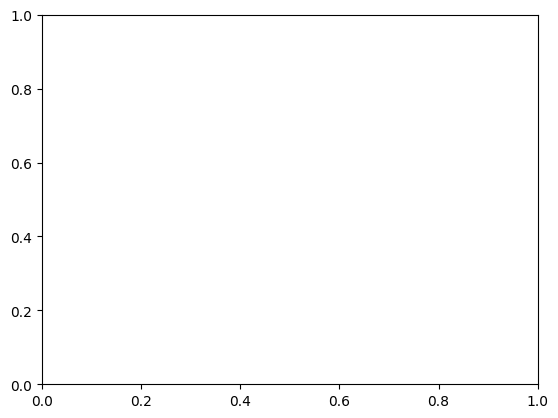

In [144]:

import matplotlib.animation as animation
import numba as nb

fig, ax = plt.subplots()

@nb.jit(nopython=True)
def create_graph(image, sections, height_region):
    mean_depth_graph = np.zeros(sections)

    max_depth = np.max(image)
    height = image.shape[0]

    center = image.shape[0] // 2
    region_IMG = image[center - height_region // 2:center + height_region // 2]

    for i in range(sections):
        start_col = i * (region_IMG.shape[1] // sections)
        end_col = (i + 1) * (region_IMG.shape[1] // sections)
        region = region_IMG[:, start_col:end_col]

        total = 0
        count = 0
        for row in range(region.shape[0]):
            for col in range(region.shape[1]):
                if region[row, col] > 0:
                    total += region[row, col]
                    count += 1

        mean_depth = total / count if count > 0 else 0
        mean_depth_graph[i] = mean_depth
    return mean_depth_graph


def showFirstNotZero(frame):
    # frames = []
    is_first = True
    for i in range(0, 400):
        frame = create_graph(pointcloud1, 640, i)
        # ax.set_title(f"Frame {i}")
        
        # print the frame number if it dont have any 0
        if 0 not in frame and is_first:
            return i
    
    # data = ax.plot(frame, color="blue",)
    # frames.append(data)

frames = []
for i in range(1, 100):
    # load the pointcloud from file as data\depth_image.npy ({i}).npy
    pc = np.load(f"data\depth_image.npy ({i}).npy")
    frames.append(pc)

    # show the first frame that dont have any 0
min_range = [ showFirstNotZero(pc) for pc in frames ]
print(min_range)

print(f"Frame {i} from {min_range}")

    

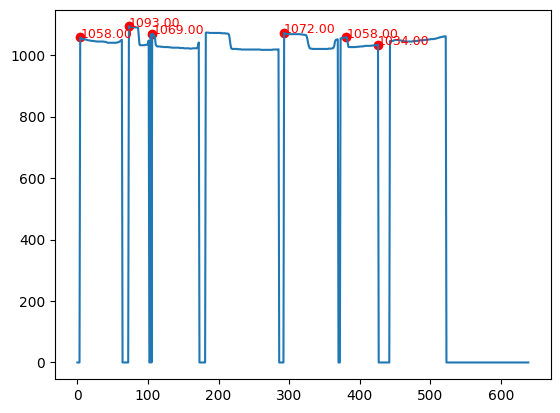

In [168]:
# obterner los maximos y minimos de los frames para > 0
from scipy.signal import argrelmax, argrelmin
import numpy as np

graph_data = frames[1][240]

peaks = argrelmax(graph_data, order=10)
valleys = argrelmin(graph_data, order=10)

#remove the first and last peak and valley
# peaks = (peaks[0][1:-1],)
# valleys = (valleys[0][1:-1],)

plt.plot(graph_data)
# show also the value peaks and valleys
plt.scatter(peaks, graph_data[peaks], color='red')
plt.scatter(valleys, graph_data[valleys], color='green')

for i in range(len(peaks[0])):
    x = peaks[0][i]
    y = graph_data[peaks[0][i]]
    value = f"{graph_data[peaks[0][i]]:.2f}"
    plt.text(x, y, value, fontsize=9, color='red')
for i in range(len(valleys[0])):
    x = valleys[0][i]
    y = graph_data[valleys[0][i]]
    value = f"{graph_data[valleys[0][i]]:.2f}"
    plt.text(x, y, value, fontsize=9, color='green')

plt.show()

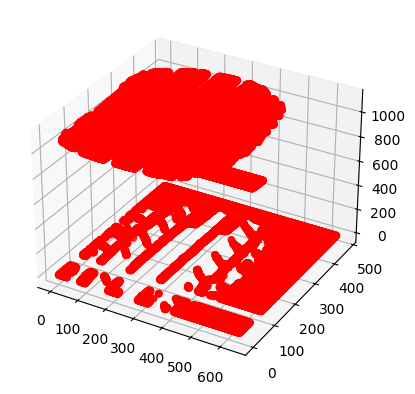

In [130]:
# 3d plot of the point clouds plointcloud1 and pointcloud2 (480, 640) as points in 3d space with scatter plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

x = np.arange(0, 640, 1)
y = np.arange(0, 480, 1)
X, Y = np.meshgrid(x, y)
Z = pointcloud1

ax.scatter(X, Y, Z, c='r')


plt.show()


In [131]:
from simpleicp import PointCloud, SimpleICP

# Transform point clouds (480, 640) into n-by-3 numpy arrays
pc1 = np.array([[x, y, pointcloud1[x, y]] for x in range(pointcloud1.shape[0]) for y in range(pointcloud1.shape[1]) if pointcloud1[x, y] != 0])
pc2 = np.array([[x, y, pointcloud2[x, y]] for x in range(pointcloud2.shape[0]) for y in range(pointcloud2.shape[1]) if pointcloud2[x, y] != 0])



p1 = PointCloud(pc1, columns=['x', 'y', 'z'])
p2 = PointCloud(pc2, columns=['x', 'y', 'z'])

icp = SimpleICP()
icp.add_point_clouds(p1, p2)
H, X_mov_transformed, rigid_body_transformation_params, distance_residuals = icp.run()
print(X_mov_transformed)



Select points for correspondences in fixed point cloud ...
Estimate normals of selected points ...
Start iterations ...
iteration | correspondences | mean(residuals) |  std(residuals)
   orig:0 |             792 |          0.0332 |          0.7696
        1 |             791 |          0.0109 |          0.7138
        2 |             775 |         -0.0004 |          0.6298
        3 |             773 |         -0.0088 |          0.6214
        4 |             777 |         -0.0160 |          0.6054
        5 |             785 |         -0.0130 |          0.5971
        6 |             789 |         -0.0042 |          0.6086
        7 |             785 |         -0.0043 |          0.5802
        8 |             791 |         -0.0254 |          0.5916
        9 |             788 |         -0.0152 |          0.5770
       10 |             792 |         -0.0186 |          0.5877
       11 |             791 |          0.0018 |          0.5901
       12 |             792 |          0.0009 | 

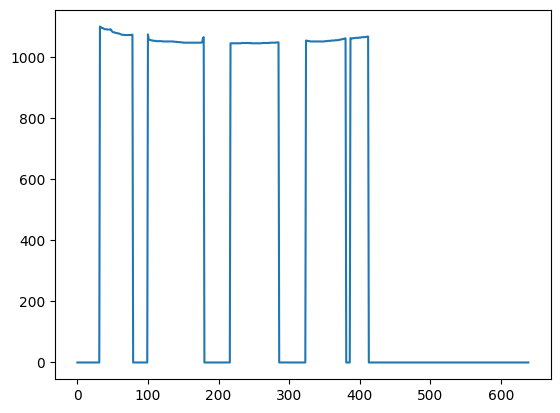

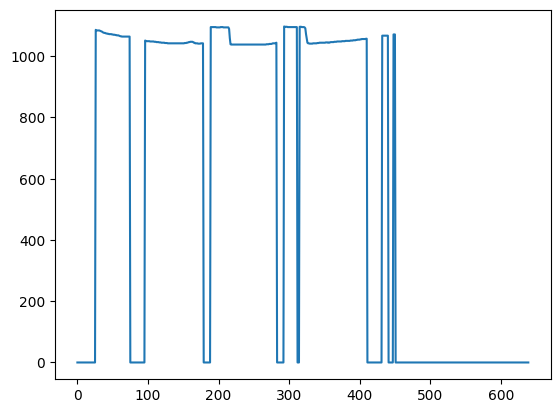

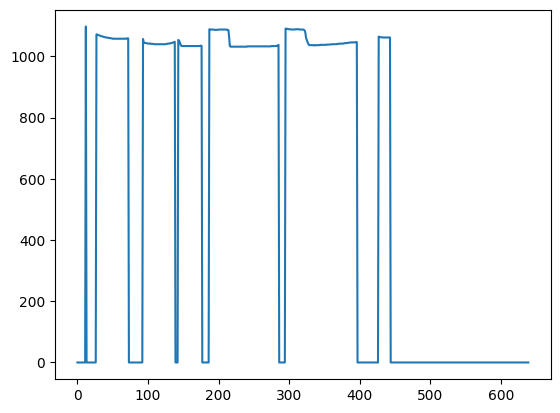

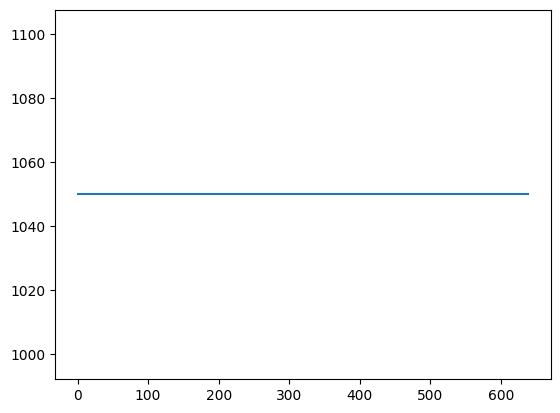

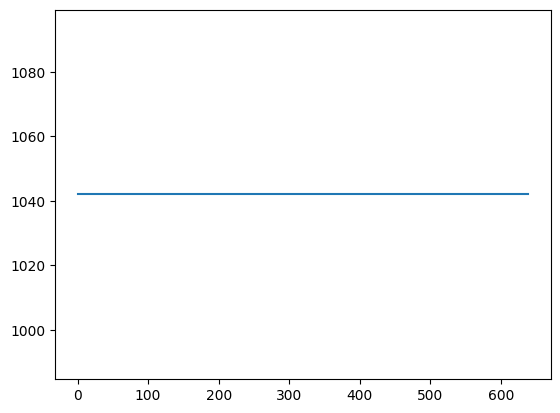

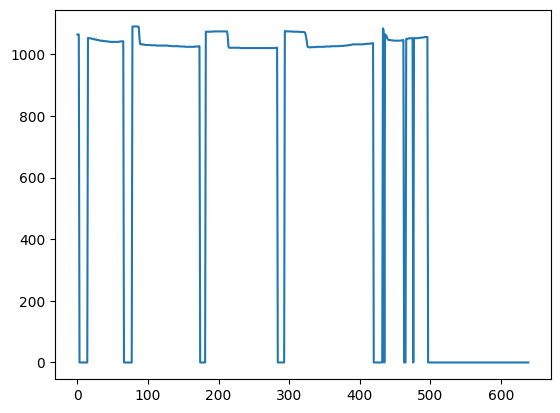

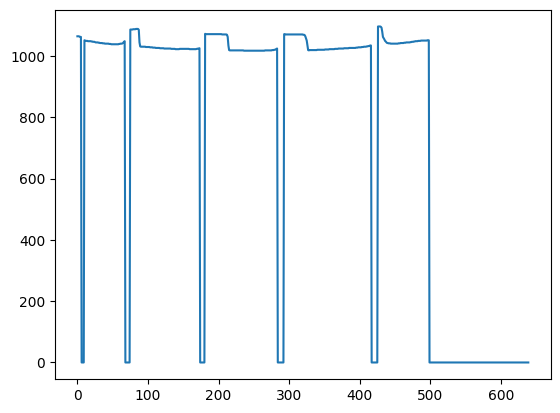

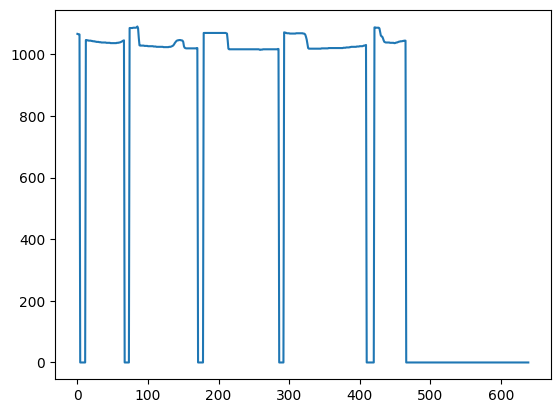

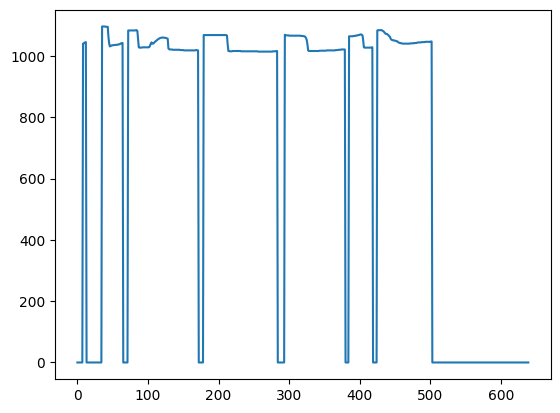

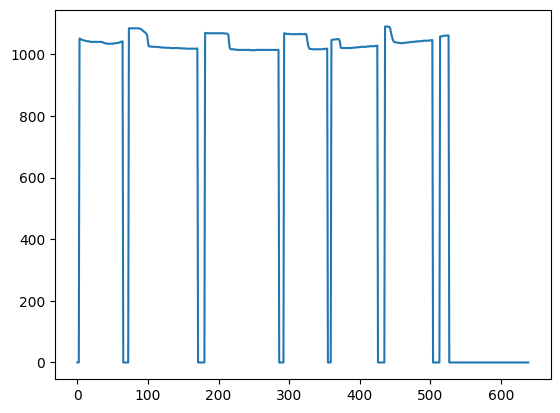

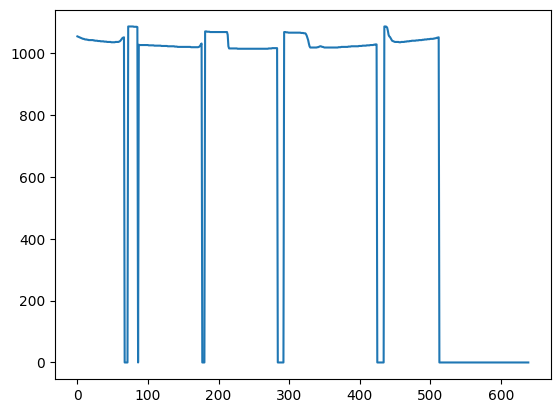

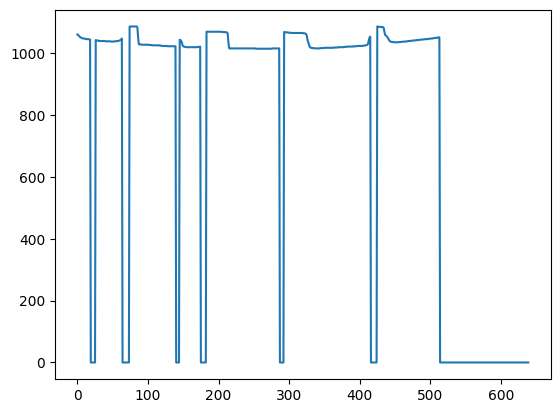

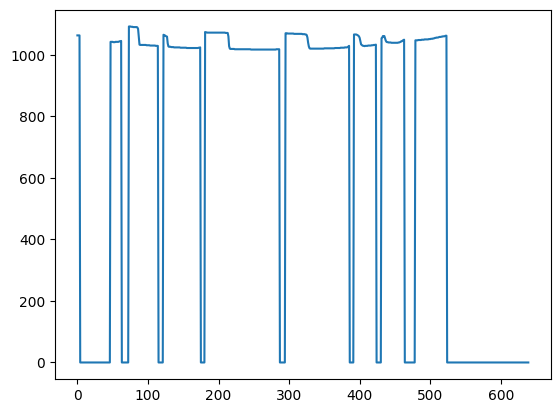

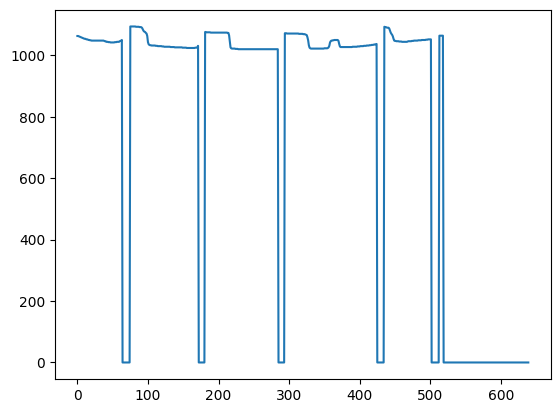

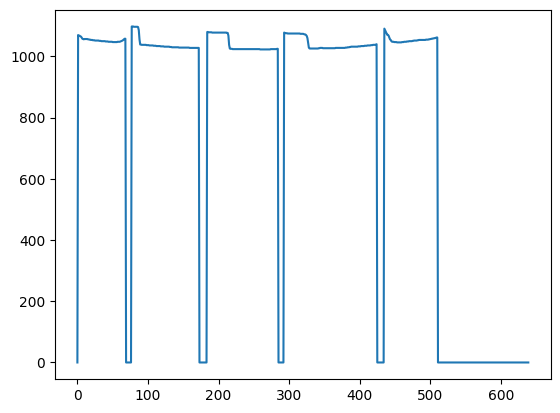

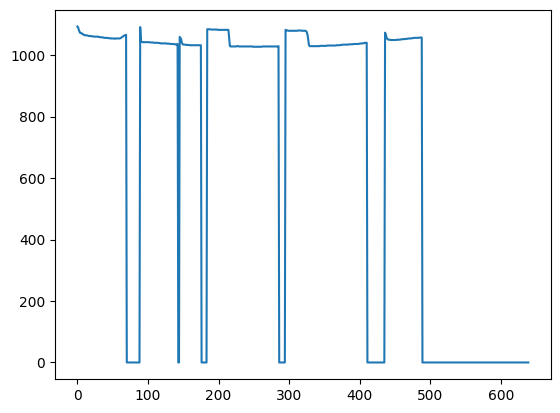

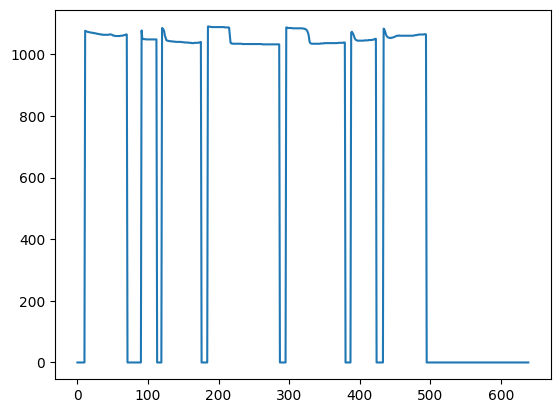

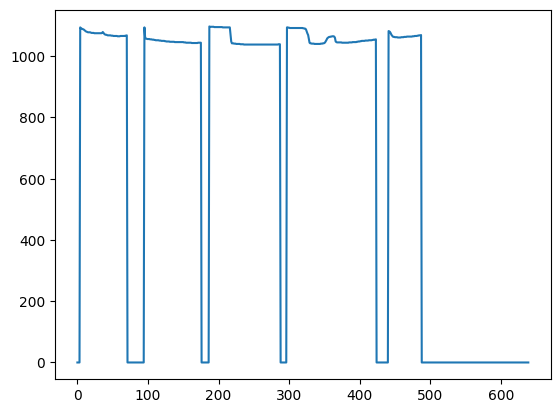

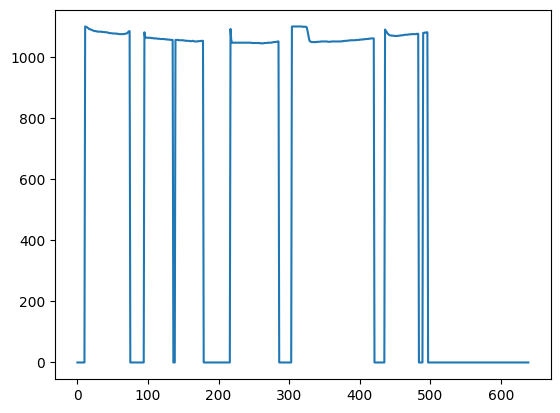

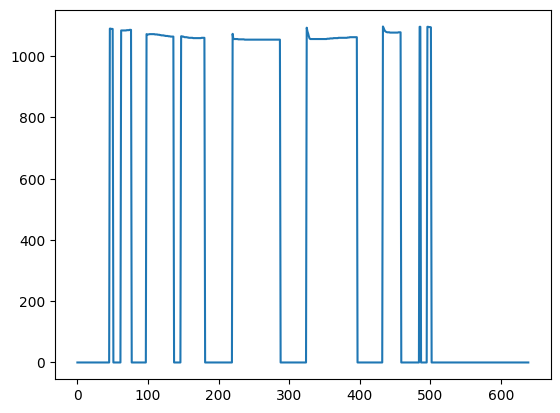

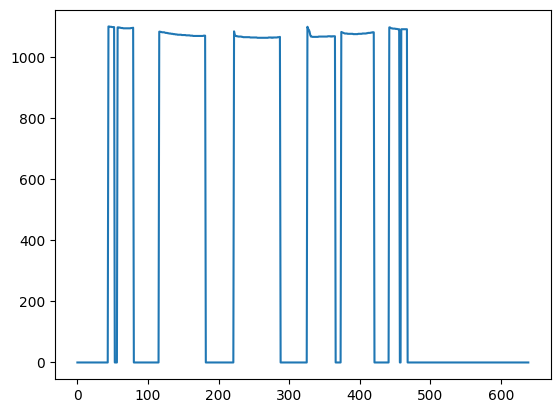

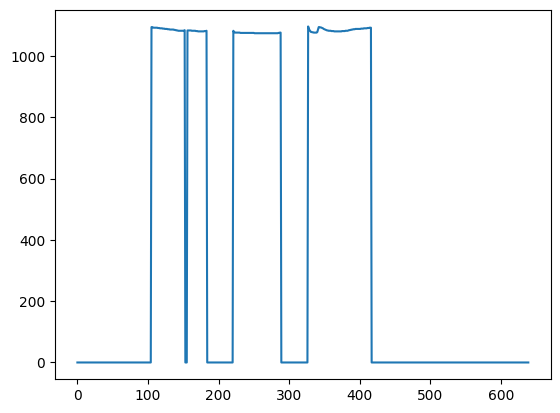

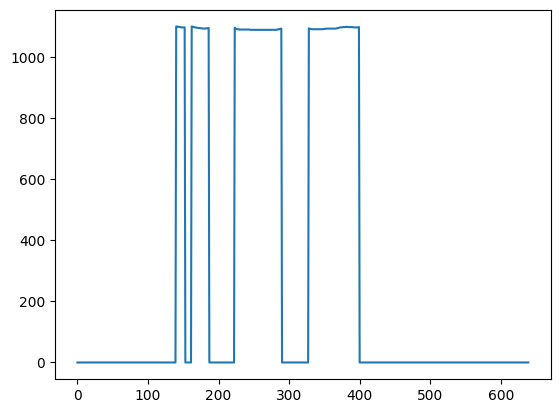

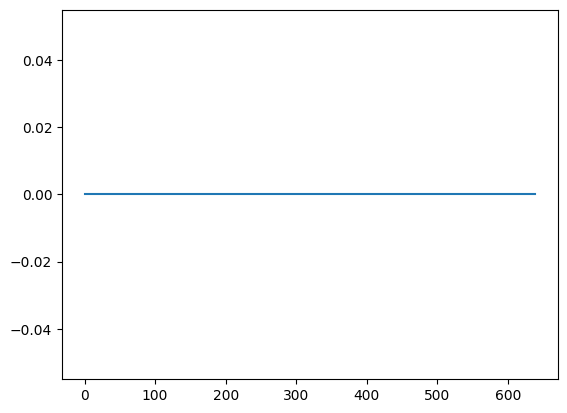

In [170]:
from scipy.signal import find_peaks

def reconstruct_sclice(middle):
    for i, value in enumerate(middle):
        if value == 0:
            if i == 0:
                middle[i] = middle[i+1]
            elif i == 639:
                middle[i] = middle[i-1]
            else:
                middle[i] = (middle[i-1] + middle[i+1]) / 2
    return middle


#plot different slices of the pointcloud
for i in range(0, 479, 20):
    middle = pointcloud1[i]
    max_peaks, _ = find_peaks(middle, height=0)
    min_peaks, _ = find_peaks(-middle, height=0)


    plt.plot(middle)
    plt.show()
    # plt.plot(max_peaks, middle[max_peaks], "x")
    # plt.plot(min_peaks, middle[min_peaks], "x")

    # for i in range(len(max_peaks)):
    #     plt.text(max_peaks[i], middle[max_peaks[i]], str(middle[max_peaks[i]]))
    # for i in range(len(min_peaks)):
    #     plt.text(min_peaks[i], middle[min_peaks[i]], str(middle[min_peaks[i]]))


plt.show()

C:\Users\manu\AppData\Local\Temp\ipykernel_10588\149038146.py:20: RuntimeWarning: overflow encountered in scalar subtract
  diffs.append(abs(pointcloud1[240][maxs[0][i]] - pointcloud1[240][mins[0][j]]))


[1, 13, 20, 25, 22, 14, 65524, 65518, 3, 65531, 4, 16, 23, 28, 25, 17, 65527, 65521, 6, 65534, 51, 63, 70, 75, 72, 64, 38, 32, 53, 45, 24, 36, 43, 48, 45, 37, 11, 5, 26, 18, 65519, 65531, 2, 7, 4, 65532, 65506, 65500, 65521, 65513, 33, 45, 52, 57, 54, 46, 20, 14, 35, 27, 65513, 65525, 65532, 1, 65534, 65526, 65500, 65494, 65515, 65507, 29, 41, 48, 53, 50, 42, 16, 10, 31, 23, 65524, 0, 7, 12, 9, 1, 65511, 65505, 65526, 65518, 25, 37, 44, 49, 46, 38, 12, 6, 27, 19, 65528, 4, 11, 16, 13, 5, 65515, 65509, 65530, 65522, 20, 32, 39, 44, 41, 33, 7, 1, 22, 14, 20, 32, 39, 44, 41, 33, 7, 1, 22, 14, 8, 20, 27, 32, 29, 21, 65531, 65525, 10, 2, 21, 33, 40, 45, 42, 34, 8, 2, 23, 15]


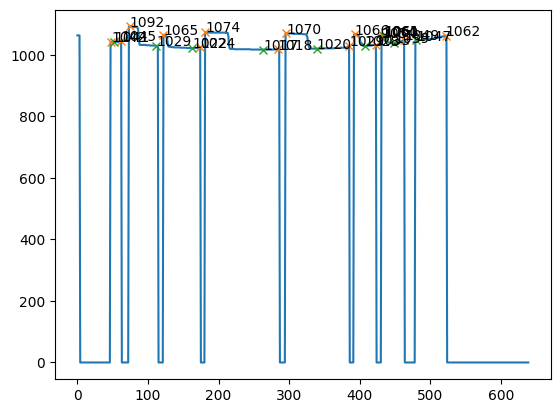

In [133]:
# get the max and min relatives of the pointcloud (480x640)
from scipy.signal import find_peaks

maxs = find_peaks(pointcloud1[240], height=0)
mins = find_peaks(-pointcloud1[240], height=0)

# plot the maxs and mins inside the pointcloud with the values as text
plt.plot(pointcloud1[240])
plt.plot(maxs[0], pointcloud1[240][maxs[0]], "x")
plt.plot(mins[0], pointcloud1[240][mins[0]], "x")
for i in range(len(maxs[0])):
    plt.text(maxs[0][i], pointcloud1[240][maxs[0][i]], str(pointcloud1[240][maxs[0][i]]))
for i in range(len(mins[0])):
    plt.text(mins[0][i], pointcloud1[240][mins[0][i]], str(pointcloud1[240][mins[0][i]]))
    
#print differences between maxs and mins
diffs = []
for i in range(len(maxs[0])):
    for j in range(len(mins[0])):
        diffs.append(abs(pointcloud1[240][maxs[0][i]] - pointcloud1[240][mins[0][j]]))
print(diffs)


plt.show()
